In [363]:
import pandas as pd
import numpy as np
import scipy.stats as stat
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels as sm
from sklearn import preprocessing 
import random


In [364]:
df=pd.read_csv("C:/Users/gesto/Downloads/phl_hec_all_confirmed.csv")
df

,P. Name,P. Name Kepler,P. Name KOI,P. Zone Class,P. Mass Class,P. Composition Class,P. Atmosphere Class,P. Habitable Class,P. Min Mass (EU),P. Mass (EU),...,P. Int ESI,P. Surf ESI,P. ESI,S. HabCat,P. Habitable,P. Hab Moon,P. Confirmed,P. Disc. Method,P. Disc. Year,Unnamed: 68
0,1RXS 1609 b,NaN,NaN,Cold,Jovian,gas,hydrogen-rich,non-habitable,NaN,4451.16,...,0,0,0.05,0,0,0,1,Imaging,2008,NaN
1,1SWASP J1407 b,NaN,NaN,Cold,Jovian,gas,hydrogen-rich,non-habitable,6358.80,6358.80,...,0,0,0.07,0,0,0,1,Primary Transit,2012,NaN
2,2M 0103-55(AB) b,NaN,NaN,Cold,Jovian,gas,hydrogen-rich,non-habitable,4133.22,4133.22,...,0,0,0.06,0,0,0,1,Imaging,2013,NaN
3,2M 0122-24 b,NaN,NaN,Cold,Jovian,gas,hydrogen-rich,non-habitable,NaN,6358.80,...,0,0,0.08,0,0,0,1,Imaging,2013,NaN
4,2M 0219-39 b,NaN,NaN,Cold,Jovian,gas,hydrogen-rich,non-habitable,NaN,4419.37,...,0,0,0.06,0,0,0,1,Imaging,2015,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3870,YBP1194 b,NaN,NaN,Hot,Jovian,gas,metals-rich,non-habitable,108.10,108.10,...,0,0,0.16,0,0,0,1,Radial Velocity,2014,NaN
3871,YBP1514 b,NaN,NaN,Hot,Jovian,gas,metals-rich,non-habitable,127.18,127.18,...,0,0,0.15,0,0,0,1,Radial Velocity,2014,NaN
3872,YZ Cet b,NaN,NaN,Hot,Terran,rocky-iron,metals-rich,non-habitable,0.76,0.76,...,0,0,0.43,0,0,0,1,Radial Velocity,2017,NaN
3873,YZ Cet c,NaN,NaN,Hot,Terran,rocky-iron,metals-rich,non-habitable,0.99,0.99,...,0,0,0.53,0,0,0,1,Radial Velocity,2017,NaN


In [365]:
df=df.drop(['P. Max Mass (EU)','P. Surf ESI','P. Int ESI','P. Name KOI','S. Name','S. Name HD','S. Name HIP','P. Min Mass (EU)','P. SPH','P. Ts Max (K)','P. Ts Min (K)','P. Ts Mean (K)','P. Name','P. Name Kepler','P. Teq Min (K)','P. Teq Max (K)','P. Teq Mean (K)','S. Hab Zone Max (AU)','P. Mean Distance (AU)','Unnamed: 68','P. SFlux Min (EU)','P. SFlux Max (EU)'],axis=1)

In [366]:
df['P. SFlux Mean (EU)']=pd.to_numeric(df['P. SFlux Mean (EU)'], errors='coerce')

In [367]:
numeric_var_names=[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object', 'O']]


In [368]:
df_num=df[numeric_var_names]

In [369]:
df_cat=df[cat_var_names]

In [370]:
def test_summary(x):
    mean = x.mean()
    sum = x.sum()
    std = x.std()
    return pd.Series([mean, sum, std], index=['avg', 'total', 'std'])

In [371]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR','MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])


In [372]:
num_summary=df_num.apply(var_summary).T

In [373]:
num_summary.to_csv('C:/Users/gesto/Downloads/num_summary.csv')

In [374]:
df_cat=df.select_dtypes(include=['object'])

In [375]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

df_summary=df_cat.apply(cat_summary)

In [376]:
#Handling missings 
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

df_num=df_num.apply(Missing_imputation)

num_summary=df_num.apply(var_summary).T
num_summary
df_num.head()

,P. Mass (EU),P. Radius (EU),P. Density (EU),P. Gravity (EU),P. Esc Vel (EU),P. SFlux Mean (EU),P. Surf Press (EU),P. Mag,P. Appar Size (deg),P. Period (days),...,S. Hab Zone Min (AU),P. HZD,P. HZC,P. HZA,P. HZI,P. ESI,S. HabCat,P. Habitable,P. Hab Moon,P. Confirmed
0,4451.16,19.04,0.64,12.28,15.29,4.080000e-06,2870.4,-10.06,36.81,12.9,...,0.540,800.07,23.51,85.62,0.00,0.05,0,0,0,1
1,6358.80,10.94,4.86,53.12,24.11,2.166914e-02,30873.8,-18.21,20.91,3725.0,...,0.461,9.07,15.30,45.41,0.02,0.07,0,0,0,1
2,4133.22,11.40,2.79,31.79,19.04,3.960000e-06,11520.8,-8.91,21.80,12.9,...,0.136,793.67,12.57,107.44,0.00,0.06,0,0,0,1
3,6358.80,11.20,4.53,50.69,23.83,1.030000e-05,28780.4,-9.92,21.41,12.9,...,0.136,490.45,15.72,119.46,0.00,0.08,0,0,0,1
4,4419.37,16.13,1.05,16.99,16.55,2.370000e-07,4655.6,-6.60,31.03,12.9,...,0.062,3028.82,19.46,133.25,0.00,0.06,0,0,0,1


In [377]:
#Handling Outliers 
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(upper=x.quantile(0.01))
    return x

df_num=df_num.apply(outlier_capping)

In [378]:
 def create_dummies( df, colname ):
     col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
     df = pd.concat([df, col_dummies], axis=1)
     df.drop( colname, axis = 1, inplace = True )
     return df

In [379]:
for c_feature in ['P. Mass Class', 'P. Composition Class','P. Disc. Method','S. Constellation','P. Zone Class','P. Atmosphere Class']:
     df_cat[c_feature] = df_cat[c_feature].astype('category')
     df_cat = create_dummies(df_cat , c_feature )

label_encoder = preprocessing.LabelEncoder()  


In [380]:
df_cat['S. Type']= df_cat['S. Type'].astype('str') 
df_cat['S. Type']= label_encoder.fit_transform(df_cat['S. Type'])
df_cat['P. Disc. Year']= label_encoder.fit_transform(df_cat['P. Disc. Year']) 

In [381]:
df_new = pd.concat([df_num,df_cat], axis=1)

In [382]:
df_new.to_csv('C:/Users/gesto/Downloads/data2.csv')

In [383]:
df_new1=df_new
df_new1.shape
df_new1.columns = df_new1.columns.str.replace(' ', '')

In [384]:
df_new1.drop_duplicates().shape

(1943, 151)

In [385]:
def train_test_split(df, test_size):
    
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    indices = df.index.tolist()
    test_indices = random.sample(population=indices, k=test_size)

    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    
    return train_df, test_df

In [386]:
train_df, test_df = train_test_split(df_new1, test_size=30)

In [387]:
data = train_df.values

In [388]:
df_new1.iloc[:,43]#target class
cols = df_new1.columns.tolist()
cols=['P.Mass(EU)',
 'P.Radius(EU)',
 'P.Density(EU)',
 'P.Gravity(EU)',
 'P.EscVel(EU)',
 'P.SFluxMean(EU)',
 'P.SurfPress(EU)',
 'P.Mag',
 'P.ApparSize(deg)',
 'P.Period(days)',
 'P.SemMajorAxis(AU)',
 'P.Eccentricity',
 'P.Inclination(deg)',
 'P.Omega(deg)',
 'S.Mass(SU)',
 'S.Radius(SU)',
 'S.Teff(K)',
 'S.Luminosity(SU)',
 'S.[Fe/H]',
 'S.Age(Gyrs)',
 'S.ApparMag',
 'S.Distance(pc)',
 'S.RA(hrs)',
 'S.DEC(deg)',
 'S.MagfromPlanet',
 'S.SizefromPlanet(deg)',
 'S.No.Planets',
 'S.No.PlanetsHZ',
 'S.HabZoneMin(AU)',
 'P.HZD',
 'P.HZC',
 'P.HZA',
 'P.HZI',
 'P.ESI',
 'S.HabCat',
 'P.Habitable',
 'P.HabMoon',
 'P.Confirmed',
 'P.AtmosphereClass_no-atmosphere',
 'S.Type',
 'P.Disc.Year',
 'P.MassClass_Mercurian',
 'P.MassClass_Neptunian',
 'P.MassClass_Subterran',
 'P.MassClass_Superterran',
 'P.MassClass_Terran',
 'P.CompositionClass_iron',
 'P.CompositionClass_rocky-iron',
 'P.CompositionClass_rocky-water',
 'P.CompositionClass_water-gas',
 'P.Disc.Method_Imaging',
 'P.Disc.Method_Microlensing',
 'P.Disc.Method_Other',
 'P.Disc.Method_PrimaryTransit',
 'P.Disc.Method_Pulsar',
 'P.Disc.Method_RadialVelocity',
 'P.Disc.Method_TTV',
 'P.Disc.Method_Transit',
 'P.Disc.Method_radialvelocity',
 'P.Disc.Method_transit',
 'S.Constellation_Ant',
 'S.Constellation_Aps',
 'S.Constellation_Aql',
 'S.Constellation_Aqr',
 'S.Constellation_Ara',
 'S.Constellation_Ari',
 'S.Constellation_Aur',
 'S.Constellation_Boo',
 'S.Constellation_CMa',
 'S.Constellation_CMi',
 'S.Constellation_CVn',
 'S.Constellation_Cae',
 'S.Constellation_Cam',
 'S.Constellation_Cap',
 'S.Constellation_Car',
 'S.Constellation_Cas',
 'S.Constellation_Cen',
 'S.Constellation_Cep',
 'S.Constellation_Cet',
 'S.Constellation_Cha',
 'S.Constellation_Cir',
 'S.Constellation_Cnc',
 'S.Constellation_Col',
 'S.Constellation_Com',
 'S.Constellation_CrA',
 'S.Constellation_CrB',
 'S.Constellation_Crt',
 'S.Constellation_Cru',
 'S.Constellation_Crv',
 'S.Constellation_Cyg',
 'S.Constellation_Del',
 'S.Constellation_Dor',
 'S.Constellation_Dra',
 'S.Constellation_Equ',
 'S.Constellation_Eri',
 'S.Constellation_For',
 'S.Constellation_Gem',
 'S.Constellation_Gru',
 'S.Constellation_Her',
 'S.Constellation_Hor',
 'S.Constellation_Hya',
 'S.Constellation_Hyi',
 'S.Constellation_Ind',
 'S.Constellation_LMi',
 'S.Constellation_Lac',
 'S.Constellation_Leo',
 'S.Constellation_Lep',
 'S.Constellation_Lib',
 'S.Constellation_Lup',
 'S.Constellation_Lyn',
 'S.Constellation_Lyr',
 'S.Constellation_Men',
 'S.Constellation_Mic',
 'S.Constellation_Mon',
 'S.Constellation_Mus',
 'S.Constellation_Nor',
 'S.Constellation_Oct',
 'S.Constellation_Oph',
 'S.Constellation_Ori',
 'S.Constellation_Pav',
 'S.Constellation_Peg',
 'S.Constellation_Per',
 'S.Constellation_Phe',
 'S.Constellation_Pic',
 'S.Constellation_PsA',
 'S.Constellation_Psc',
 'S.Constellation_Pup',
 'S.Constellation_Pyx',
 'S.Constellation_Ret',
 'S.Constellation_Scl',
 'S.Constellation_Sco',
 'S.Constellation_Sct',
 'S.Constellation_Ser',
 'S.Constellation_Sex',
 'S.Constellation_Sge',
 'S.Constellation_Sgr',
 'S.Constellation_Tau',
 'S.Constellation_Tel',
 'S.Constellation_TrA',
 'S.Constellation_Tri',
 'S.Constellation_Tuc',
 'S.Constellation_UMa',
 'S.Constellation_UMi',
 'S.Constellation_Vel',
 'S.Constellation_Vir',
 'S.Constellation_Vol',
 'S.Constellation_Vul',
 'P.ZoneClass_Hot',
 'P.ZoneClass_Warm',
 'P.AtmosphereClass_metals-rich',
'P.HabitableClass']

df_new1=df_new1[cols]
#df_new1.head(5)

In [389]:
def classify_data(data):   
    label_column = data[:, -1]
    unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)

    index = counts_unique_classes.argmax()
    classification = unique_classes[index]
    
    return classification

In [390]:
def get_potential_splits(data):
    
    potential_splits = {}
    _, n_columns = data.shape
    for column_index in range(n_columns - 1):        # excluding the last column which is the label
        potential_splits[column_index] = []
        values = data[:, column_index]
        unique_values = np.unique(values)
        #print(unique_values)
        for index in range(len(unique_values)):
            if index != 0:
                current_value = unique_values[index]
                previous_value = unique_values[index - 1]
                #print(current_value)
                #print(previous_value)
                potential_split = (int(current_value)+ int(previous_value)) / 2
                
                potential_splits[column_index].append(potential_split)
    
    return potential_splits


In [391]:
def split_data(data, split_column, split_value):
    
    split_column_values = data[:, split_column]

    data_below = data[split_column_values <= split_value]
    data_above = data[split_column_values >  split_value]
    
    return data_below, data_above

In [392]:
def calculate_entropy(data):
    
    label_column = data[:, -1]
    _, counts = np.unique(label_column, return_counts=True)

    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
     
    return entropy

In [393]:
def calculate_overall_entropy(data_below, data_above):
    
    n = len(data_below) + len(data_above)
    p_data_below = len(data_below) / n
    p_data_above = len(data_above) / n

    overall_entropy =  (p_data_below * calculate_entropy(data_below) 
                      + p_data_above * calculate_entropy(data_above))
    
    return overall_entropy

In [394]:
def determine_best_split(data, potential_splits):
    
    overall_entropy = 9999
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data, split_column=column_index, split_value=value)
            current_overall_entropy = calculate_overall_entropy(data_below, data_above)

            if current_overall_entropy <= overall_entropy:
                overall_entropy = current_overall_entropy
                best_split_column = column_index
                best_split_value = value
    
    return best_split_column, best_split_value

In [395]:
def check_purity(data):
    
    label_column = data[:, -1]
    unique_classes = np.unique(label_column)

    if len(unique_classes) == 1:
        return True
    else:
        return False

In [396]:
def determine_type_of_feature(df):
    
    feature_types = []
    n_unique_values_treshold = 15
    for feature in df.columns:
        if feature != "label":
            unique_values = df[feature].unique()
            example_value = unique_values[0]

            if (isinstance(example_value, str)) or (len(unique_values) <= n_unique_values_treshold):
                feature_types.append("categorical")
            else:
                feature_types.append("continuous")
    
    return feature_types

In [397]:
def decision_tree_algorithm(df, counter=0, min_samples=2, max_depth=5):
    
    # data preparations
    if counter == 0:
        global COLUMN_HEADERS, FEATURE_TYPES
        COLUMN_HEADERS = df.columns
        FEATURE_TYPES = determine_type_of_feature(df)
        data = df.values
    else:
        data = df           
    
    
    # base cases
    if (check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
        classification = classify_data(data)
        
        return classification

    
    # recursive part
    else:    
        counter += 1

        # helper functions 
        potential_splits = get_potential_splits(data)
        split_column, split_value = determine_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_column, split_value)
        
        # determine question
        feature_name = COLUMN_HEADERS[split_column]
        type_of_feature = FEATURE_TYPES[split_column]
        if type_of_feature == "continuous":
            question = "{} <= {}".format(feature_name, split_value)
            
        # feature is categorical
        else:
            question = "{} = {}".format(feature_name, split_value)
        
        # instantiate sub-tree
        sub_tree = {question: []}
        
        # find answers (recursion)
        yes_answer = decision_tree_algorithm(data_below, counter, min_samples, max_depth)
        no_answer = decision_tree_algorithm(data_above, counter, min_samples, max_depth)
        
        # If the answers are the same, then there is no point in asking the qestion.
        # This could happen when the data is classified even though it is not pure
        # yet (min_samples or max_depth base case).
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
        return sub_tree

In [398]:
train_df.head()
cols = train_df.columns.tolist()
cols=['P.Mass(EU)',
 'P.Radius(EU)',
 'P.Density(EU)',
 'P.Gravity(EU)',
 'P.EscVel(EU)',
 'P.SFluxMean(EU)',
 'P.SurfPress(EU)',
 'P.Mag',
 'P.ApparSize(deg)',
 'P.Period(days)',
 'P.SemMajorAxis(AU)',
 'P.Eccentricity',
 'P.Inclination(deg)',
 'P.Omega(deg)',
 'S.Mass(SU)',
 'S.Radius(SU)',
 'S.Teff(K)',
 'S.Luminosity(SU)',
 'S.[Fe/H]',
 'S.Age(Gyrs)',
 'S.ApparMag',
 'S.Distance(pc)',
 'S.RA(hrs)',
 'S.DEC(deg)',
 'S.MagfromPlanet',
 'S.SizefromPlanet(deg)',
 'S.No.Planets',
 'S.No.PlanetsHZ',
 'S.HabZoneMin(AU)',
 'P.HZD',
 'P.HZC',
 'P.HZA',
 'P.HZI',
 'P.ESI',
 'S.HabCat',
 'P.Habitable',
 'P.HabMoon',
 'P.Confirmed',
 'P.AtmosphereClass_no-atmosphere',
 'S.Type',
 'P.Disc.Year',
 'P.MassClass_Mercurian',
 'P.MassClass_Neptunian',
 'P.MassClass_Subterran',
 'P.MassClass_Superterran',
 'P.MassClass_Terran',
 'P.CompositionClass_iron',
 'P.CompositionClass_rocky-iron',
 'P.CompositionClass_rocky-water',
 'P.CompositionClass_water-gas',
 'P.Disc.Method_Imaging',
 'P.Disc.Method_Microlensing',
 'P.Disc.Method_Other',
 'P.Disc.Method_PrimaryTransit',
 'P.Disc.Method_Pulsar',
 'P.Disc.Method_RadialVelocity',
 'P.Disc.Method_TTV',
 'P.Disc.Method_Transit',
 'P.Disc.Method_radialvelocity',
 'P.Disc.Method_transit',
 'S.Constellation_Ant',
 'S.Constellation_Aps',
 'S.Constellation_Aql',
 'S.Constellation_Aqr',
 'S.Constellation_Ara',
 'S.Constellation_Ari',
 'S.Constellation_Aur',
 'S.Constellation_Boo',
 'S.Constellation_CMa',
 'S.Constellation_CMi',
 'S.Constellation_CVn',
 'S.Constellation_Cae',
 'S.Constellation_Cam',
 'S.Constellation_Cap',
 'S.Constellation_Car',
 'S.Constellation_Cas',
 'S.Constellation_Cen',
 'S.Constellation_Cep',
 'S.Constellation_Cet',
 'S.Constellation_Cha',
 'S.Constellation_Cir',
 'S.Constellation_Cnc',
 'S.Constellation_Col',
 'S.Constellation_Com',
 'S.Constellation_CrA',
 'S.Constellation_CrB',
 'S.Constellation_Crt',
 'S.Constellation_Cru',
 'S.Constellation_Crv',
 'S.Constellation_Cyg',
 'S.Constellation_Del',
 'S.Constellation_Dor',
 'S.Constellation_Dra',
 'S.Constellation_Equ',
 'S.Constellation_Eri',
 'S.Constellation_For',
 'S.Constellation_Gem',
 'S.Constellation_Gru',
 'S.Constellation_Her',
 'S.Constellation_Hor',
 'S.Constellation_Hya',
 'S.Constellation_Hyi',
 'S.Constellation_Ind',
 'S.Constellation_LMi',
 'S.Constellation_Lac',
 'S.Constellation_Leo',
 'S.Constellation_Lep',
 'S.Constellation_Lib',
 'S.Constellation_Lup',
 'S.Constellation_Lyn',
 'S.Constellation_Lyr',
 'S.Constellation_Men',
 'S.Constellation_Mic',
 'S.Constellation_Mon',
 'S.Constellation_Mus',
 'S.Constellation_Nor',
 'S.Constellation_Oct',
 'S.Constellation_Oph',
 'S.Constellation_Ori',
 'S.Constellation_Pav',
 'S.Constellation_Peg',
 'S.Constellation_Per',
 'S.Constellation_Phe',
 'S.Constellation_Pic',
 'S.Constellation_PsA',
 'S.Constellation_Psc',
 'S.Constellation_Pup',
 'S.Constellation_Pyx',
 'S.Constellation_Ret',
 'S.Constellation_Scl',
 'S.Constellation_Sco',
 'S.Constellation_Sct',
 'S.Constellation_Ser',
 'S.Constellation_Sex',
 'S.Constellation_Sge',
 'S.Constellation_Sgr',
 'S.Constellation_Tau',
 'S.Constellation_Tel',
 'S.Constellation_TrA',
 'S.Constellation_Tri',
 'S.Constellation_Tuc',
 'S.Constellation_UMa',
 'S.Constellation_UMi',
 'S.Constellation_Vel',
 'S.Constellation_Vir',
 'S.Constellation_Vol',
 'S.Constellation_Vul',
 'P.ZoneClass_Hot',
 'P.ZoneClass_Warm',
 'P.AtmosphereClass_metals-rich',
'P.HabitableClass']
train_df=train_df[cols]

In [399]:
tree = decision_tree_algorithm(train_df, max_depth=6)

In [400]:
cols = test_df.columns.tolist()
cols=['P.Mass(EU)',
 'P.Radius(EU)',
 'P.Density(EU)',
 'P.Gravity(EU)',
 'P.EscVel(EU)',
 'P.SFluxMean(EU)',
 'P.SurfPress(EU)',
 'P.Mag',
 'P.ApparSize(deg)',
 'P.Period(days)',
 'P.SemMajorAxis(AU)',
 'P.Eccentricity',
 'P.Inclination(deg)',
 'P.Omega(deg)',
 'S.Mass(SU)',
 'S.Radius(SU)',
 'S.Teff(K)',
 'S.Luminosity(SU)',
 'S.[Fe/H]',
 'S.Age(Gyrs)',
 'S.ApparMag',
 'S.Distance(pc)',
 'S.RA(hrs)',
 'S.DEC(deg)',
 'S.MagfromPlanet',
 'S.SizefromPlanet(deg)',
 'S.No.Planets',
 'S.No.PlanetsHZ',
 'S.HabZoneMin(AU)',
 'P.HZD',
 'P.HZC',
 'P.HZA',
 'P.HZI',
 'P.ESI',
 'S.HabCat',
 'P.Habitable',
 'P.HabMoon',
 'P.Confirmed',
 'P.AtmosphereClass_no-atmosphere',
 'S.Type',
 'P.Disc.Year',
 'P.MassClass_Mercurian',
 'P.MassClass_Neptunian',
 'P.MassClass_Subterran',
 'P.MassClass_Superterran',
 'P.MassClass_Terran',
 'P.CompositionClass_iron',
 'P.CompositionClass_rocky-iron',
 'P.CompositionClass_rocky-water',
 'P.CompositionClass_water-gas',
 'P.Disc.Method_Imaging',
 'P.Disc.Method_Microlensing',
 'P.Disc.Method_Other',
 'P.Disc.Method_PrimaryTransit',
 'P.Disc.Method_Pulsar',
 'P.Disc.Method_RadialVelocity',
 'P.Disc.Method_TTV',
 'P.Disc.Method_Transit',
 'P.Disc.Method_radialvelocity',
 'P.Disc.Method_transit',
 'S.Constellation_Ant',
 'S.Constellation_Aps',
 'S.Constellation_Aql',
 'S.Constellation_Aqr',
 'S.Constellation_Ara',
 'S.Constellation_Ari',
 'S.Constellation_Aur',
 'S.Constellation_Boo',
 'S.Constellation_CMa',
 'S.Constellation_CMi',
 'S.Constellation_CVn',
 'S.Constellation_Cae',
 'S.Constellation_Cam',
 'S.Constellation_Cap',
 'S.Constellation_Car',
 'S.Constellation_Cas',
 'S.Constellation_Cen',
 'S.Constellation_Cep',
 'S.Constellation_Cet',
 'S.Constellation_Cha',
 'S.Constellation_Cir',
 'S.Constellation_Cnc',
 'S.Constellation_Col',
 'S.Constellation_Com',
 'S.Constellation_CrA',
 'S.Constellation_CrB',
 'S.Constellation_Crt',
 'S.Constellation_Cru',
 'S.Constellation_Crv',
 'S.Constellation_Cyg',
 'S.Constellation_Del',
 'S.Constellation_Dor',
 'S.Constellation_Dra',
 'S.Constellation_Equ',
 'S.Constellation_Eri',
 'S.Constellation_For',
 'S.Constellation_Gem',
 'S.Constellation_Gru',
 'S.Constellation_Her',
 'S.Constellation_Hor',
 'S.Constellation_Hya',
 'S.Constellation_Hyi',
 'S.Constellation_Ind',
 'S.Constellation_LMi',
 'S.Constellation_Lac',
 'S.Constellation_Leo',
 'S.Constellation_Lep',
 'S.Constellation_Lib',
 'S.Constellation_Lup',
 'S.Constellation_Lyn',
 'S.Constellation_Lyr',
 'S.Constellation_Men',
 'S.Constellation_Mic',
 'S.Constellation_Mon',
 'S.Constellation_Mus',
 'S.Constellation_Nor',
 'S.Constellation_Oct',
 'S.Constellation_Oph',
 'S.Constellation_Ori',
 'S.Constellation_Pav',
 'S.Constellation_Peg',
 'S.Constellation_Per',
 'S.Constellation_Phe',
 'S.Constellation_Pic',
 'S.Constellation_PsA',
 'S.Constellation_Psc',
 'S.Constellation_Pup',
 'S.Constellation_Pyx',
 'S.Constellation_Ret',
 'S.Constellation_Scl',
 'S.Constellation_Sco',
 'S.Constellation_Sct',
 'S.Constellation_Ser',
 'S.Constellation_Sex',
 'S.Constellation_Sge',
 'S.Constellation_Sgr',
 'S.Constellation_Tau',
 'S.Constellation_Tel',
 'S.Constellation_TrA',
 'S.Constellation_Tri',
 'S.Constellation_Tuc',
 'S.Constellation_UMa',
 'S.Constellation_UMi',
 'S.Constellation_Vel',
 'S.Constellation_Vir',
 'S.Constellation_Vol',
 'S.Constellation_Vul',
 'P.ZoneClass_Hot',
 'P.ZoneClass_Warm',
 'P.AtmosphereClass_metals-rich',
'P.HabitableClass']
test_df=test_df[cols]

In [401]:
test_df.to_csv("C:/Users/gesto/Downloads/test.csv")

In [402]:
example = test_df.iloc[3]

In [403]:
classi=[]
for i in range(0,test_df.shape[0]):
    classi.append(classify_example(test_df.iloc[i],tree))
classi

['non-habitable',
 'non-habitable',
 'non-habitable',
 'non-habitable',
 'non-habitable',
 'non-habitable',
 'non-habitable',
 'non-habitable',
 'non-habitable',
 'non-habitable',
 'non-habitable',
 'non-habitable',
 'non-habitable',
 'non-habitable',
 'non-habitable',
 'non-habitable',
 'non-habitable',
 'non-habitable',
 'non-habitable',
 'non-habitable',
 'non-habitable',
 'non-habitable',
 'non-habitable',
 'non-habitable',
 'non-habitable',
 'non-habitable',
 'non-habitable',
 'non-habitable',
 'non-habitable',
 'non-habitable']

In [404]:
def classify_example(example, tree):
    question = list(tree.keys())[0]
    #print(question) format P. Habitable = 0.5
    feature_name,comparison_operator,value = question.split(" ")

    # ask question
    if example[feature_name] <= float(value):
        answer = tree[question][0]
    else:
        answer = tree[question][1]

    # base case
    if not isinstance(answer, dict):
        return answer
    
    # recursive part
    else:
        residual_tree = answer
        return classify_example(example, residual_tree)

In [405]:
def calculate_accuracy(df, tree):

    df["classification"] = df.apply(classify_example, axis=1, args=(tree,))
    df["classification_correct"] = df["classification"] == df["P.HabitableClass"]
    
    accuracy = df["classification_correct"].mean()*100
    
    return accuracy

In [406]:
accuracy = calculate_accuracy(test_df, tree)
accuracy

100.0

## Visualization of results

In [407]:
def print_tree(tree, spacing=""):
    if isinstance(tree, str):
        print(spacing + "Predict:", tree)
        return

    # Print the current condition
    question = list(tree.keys())[0]
    print(spacing + question)

    # Get the branches
    yes_branch = tree[question][1]
    no_branch = tree[question][0]

    # Recurse
    print(spacing + '--> True:')
    print_tree(yes_branch, spacing + "  ")

    print(spacing + '--> False:')
    print_tree(no_branch, spacing + "  ")
    
print_tree(tree)

P.ZoneClass_Warm = 0.5
--> True:
  P.CompositionClass_rocky-iron = 0.5
  --> True:
    P.Disc.Method_Transit = 0.5
    --> True:
      S.Type <= 225.0
      --> True:
        S.Constellation_Vir = 0.5
        --> True:
          Predict: thermoplanet
        --> False:
          Predict: non-habitable
      --> False:
        P.MassClass_Terran = 0.5
        --> True:
          S.Constellation_Cyg = 0.5
          --> True:
            Predict: psychroplanet
          --> False:
            Predict: mesoplanet
        --> False:
          Predict: mesoplanet
    --> False:
      S.Type <= 43.0
      --> True:
        S.Constellation_Cyg = 0.5
        --> True:
          S.Type <= 219.5
          --> True:
            Predict: hypopsychroplanet
          --> False:
            Predict: mesoplanet
        --> False:
          S.Teff(K) <= 3144.0
          --> True:
            Predict: mesoplanet
          --> False:
            Predict: psychroplanet
      --> False:
        Predict: the

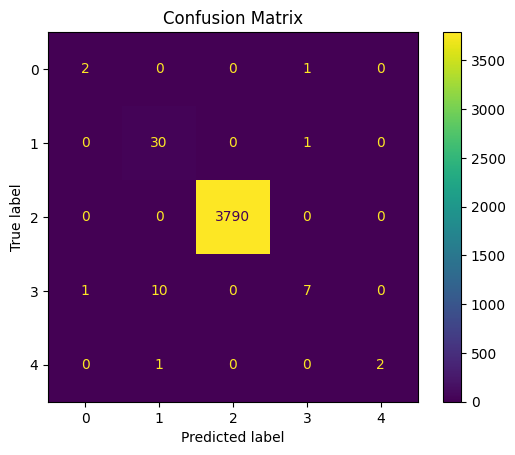

In [425]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(train_df["P.HabitableClass"], train_df.apply(classify_example, axis=1, args=(tree,)))

# Create confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot
disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()


## Using SMOTE to resample data

In [440]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Separate features (X) and target (y)
X = train_df.drop(columns=['P.HabitableClass'])
y = train_df['P.HabitableClass']

# Convert categorical columns to numeric (if not already)
X_encoded = pd.get_dummies(X)  # one-hot encoding for all categorical columns

# Encode target labels (e.g., 'non-habitable', 'mesoplanet', etc.)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Apply SMOTE
smote = SMOTE(random_state=42,k_neighbors=2)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y_encoded)

# Convert back to DataFrame for convenience
X_resampled_df = pd.DataFrame(X_resampled, columns=X_encoded.columns)
y_resampled_df = pd.Series(label_encoder.inverse_transform(y_resampled), name='P.HabitableClass')

# Combine into final balanced DataFrame
balanced_train_df = pd.concat([X_resampled_df, y_resampled_df], axis=1).sample(frac=1).head(len(train_df))


(array([761.,   0., 776.,   0.,   0., 784.,   0., 764.,   0., 760.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

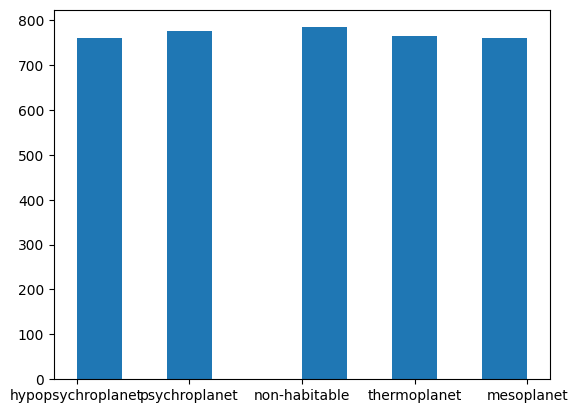

In [441]:
plt.hist(balanced_train_df["P.HabitableClass"].to_numpy())


## Rerunning the tree

In [442]:
tree = decision_tree_algorithm(balanced_train_df, max_depth=5)

In [443]:
accuracy = calculate_accuracy(test_df, tree)
accuracy

96.66666666666667

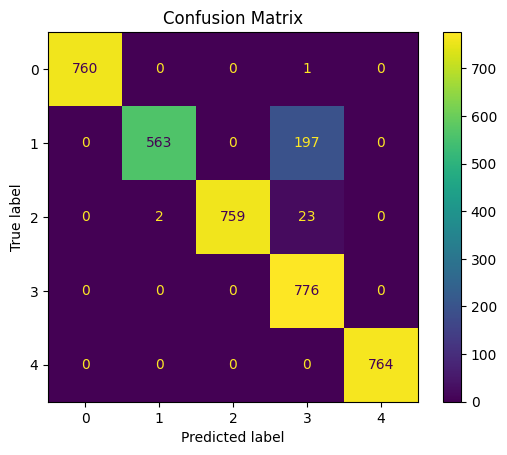

In [444]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(balanced_train_df["P.HabitableClass"], balanced_train_df.apply(classify_example, axis=1, args=(tree,)))

# Create confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot
disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()


In [445]:
print_tree(tree)

P.ZoneClass_Warm = 0.5
--> True:
  P.Disc.Method_Transit = 0.5
  --> True:
    S.Constellation_Lyr = 0.5
    --> True:
      S.Type <= 155.5
      --> True:
        S.Constellation_Vir = 0.5
        --> True:
          Predict: thermoplanet
        --> False:
          Predict: mesoplanet
      --> False:
        Predict: thermoplanet
    --> False:
      P.MassClass_Terran = 0.5
      --> True:
        S.Constellation_Cyg = 0.5
        --> True:
          Predict: psychroplanet
        --> False:
          Predict: mesoplanet
      --> False:
        P.CompositionClass_rocky-iron = 0.5
        --> True:
          Predict: mesoplanet
        --> False:
          Predict: non-habitable
  --> False:
    S.Constellation_Cyg = 0.5
    --> True:
      S.Type <= 223.5
      --> True:
        S.Constellation_Dra = 0.5
        --> True:
          Predict: psychroplanet
        --> False:
          Predict: hypopsychroplanet
      --> False:
        P.CompositionClass_rocky-iron = 0.5
        -